# PHYS 541 Assignment 5 Question 2

Snakes and Ladders, again!

a)	Implement in the snakes and ladders Markov Chain prediction (100 squares) the often adopted rule that in order to "win" the game, that you have to land EXACTLY on the final square (i.e. if you roll a number that is larger than the required number to land on the final square, you remain where you are).  These curves (Probability vs. N_rolls) for the “no snakes and ladders” and “with snakes and ladders” cases will represent a sort of “theory” that we can compare an actual simulation to.

In [17]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

[[0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
  0.16666667]
 [0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
  0.16666667]
 [0.         0.         0.33333333 0.16666667 0.16666667 0.16666667
  0.16666667]
 [0.         0.         0.         0.5        0.16666667 0.16666667
  0.16666667]
 [0.         0.         0.         0.         0.66666667 0.16666667
  0.16666667]
 [0.         0.         0.         0.         0.         0.83333333
  0.16666667]
 [0.         0.         0.         0.         0.         0.
  1.        ]]
modal number of moves: 30


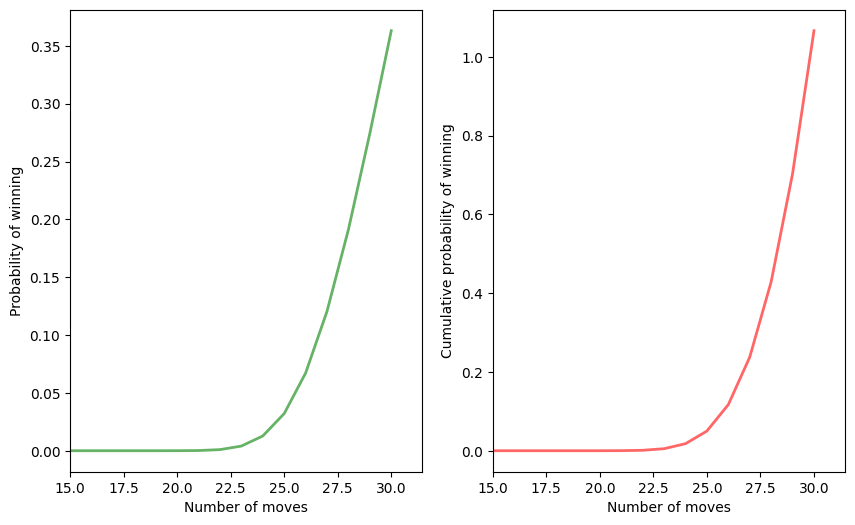

In [18]:
# Set up the transition matrix
T = np.zeros((101, 101))
for i in range(1,101):
    T[i-1,i:i+6] = 1/6

# Instead of winning by passing the end, you have to hit exactly the final square
# Edit the ending diagonal to include the probability of staying
for i in range(6):
    T[95+i,95+i] = (i+1)/6

print(T[94:101,94:101])

# The player starts at position 0.
v = np.zeros(101)
v[0] = 1

n, P, C = 0, [], []
cumulative_prob = 0
# Update the state vector v until the cumulative probability of winning
# is "effectively" 1
while cumulative_prob < 0.99999:
    n += 1
    v = v.dot(T)
    P.append(v[100])
    cumulative_prob += P[-1]
    C.append(cumulative_prob)
    
mode = np.argmax(P)+1
print('modal number of moves:', mode)

# Plot the probability of winning as a function of the number of moves
plt.rcParams['figure.figsize'] = [10, 6]
fig, ax = plt.subplots(1,2)
ax[0].plot(np.linspace(1,n,n), P, 'g', lw=2, alpha=0.6)
ax[0].set_xlim(15)
ax[0].set_xlabel('Number of moves')
ax[0].set_ylabel('Probability of winning')
ax[1].plot(np.linspace(1,n,n), C, 'r', lw=2, alpha=0.6)
ax[1].set_xlim(15)
ax[1].set_xlabel('Number of moves')
ax[1].set_ylabel('Cumulative probability of winning')


plt.show()

modal number of moves: 21


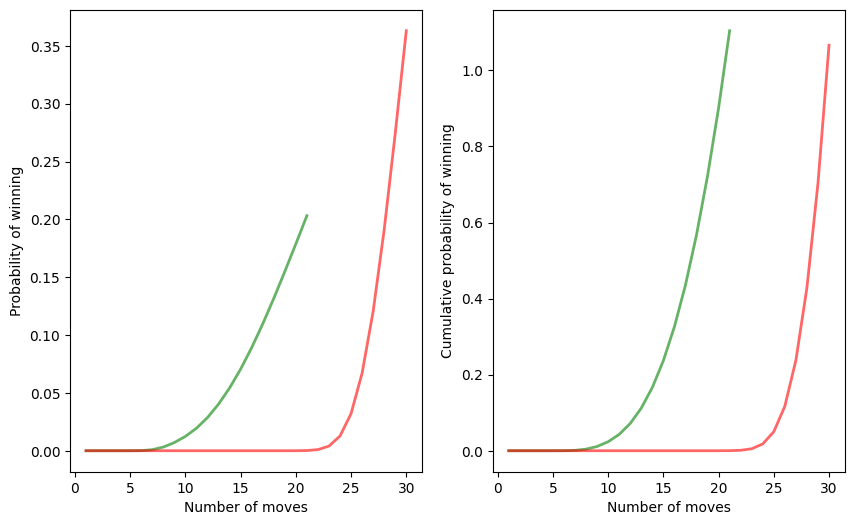

In [19]:
import numpy as np
import matplotlib.pyplot as plt

ladders = [(3,19), (15,37), (22,42), (25,64), (41,73),
           (53,74), (63,86), (76,91), (84,98)]
snakes = [(11,7), (18,13), (28,12), (36,34), (77,16),
          (47,26), (83,39), (92,75), (99,70)]
trans = ladders + snakes

# Set up the transition matrix
T = np.zeros((101, 101))
for i in range(1,101):
    T[i-1,i:i+6] = 1/6

for (i1,i2) in trans:
    iw = np.where(T[:,i1] > 0)
    T[:,i1] = 0
    T[iw,i2] += 1/6

# Instead of winning by passing the end, you have to hit exactly the final square
# Edit the ending diagonal to include the probability of staying
for i in range(6):
    T[95+i,95+i] = (i+1)/6
for snake in snakes:
    T[snake,100] = 0

# The player starts at position 0.
v = np.zeros(101)
v[0] = 1

ns, Ps, Cs = 0, [], []
cumulative_prob = 0
# Update the state vector v until the cumulative probability of winning
# is "effectively" 1
while cumulative_prob < 0.99999:
    ns += 1
    v = v.dot(T)
    Ps.append(v[100])
    cumulative_prob += Ps[-1]
    Cs.append(cumulative_prob)
    
mode = np.argmax(Ps)+1
print('modal number of moves:', mode)

# Plot the probability of winning as a function of the number of moves
fig, ax = plt.subplots(1,2)
ax[0].plot(np.linspace(1,ns,ns), Ps, 'g-', lw=2, alpha=0.6, label='Markov')
ax[0].plot(np.linspace(1,n,n), P, 'r-', lw=2, alpha=0.6, label='No snakes or ladders')
ax[0].set_xlabel('Number of moves')
ax[0].set_ylabel('Probability of winning')
ax[1].plot(np.linspace(1,ns,ns), Cs, 'g-', lw=2, alpha=0.6, label='Markov')
ax[1].plot(np.linspace(1,n,n), C, 'r-', lw=2, alpha=0.6, label='No snakes or ladders')
ax[1].set_xlabel('Number of moves')
ax[1].set_ylabel('Cumulative probability of winning')

plt.show()

b)	Write an actual simulation of a single-player snakes and ladders game, for the cases of “no snakes and ladders” and “with snakes and ladders”, and then compare to the Markov Chain predictions from part (a).  The idea here is that you just start on square zero, and roll a six-sided fair die, and move the appropriate number of squares, and keep rolling until you reach square 100 (exactly).  You will have to think carefully about how you handle the situation where you land on either a “ladder” or “snake” square.

In [20]:
# No snakes/ladders
def sim_no_snakes():
    position = 0
    n_turns = 0
    while position != 100:
        roll = np.random.randint(1,6)
        if (position + roll) <= 100:
            position += roll
        n_turns += 1
    return n_turns

In [21]:
# WITH snakes/ladders
def sim_snakes():
    position = 0
    n_turns = 0
    while position != 100:
        roll = np.random.randint(1,6)
        if (position + roll) <= 100:
            position += roll
        # Snake/ladder check
        for (p1,p2) in trans:
            if position == p1:
                position = p2
        n_turns += 1
    return n_turns

Text(0.5, 0, 'Number of moves')

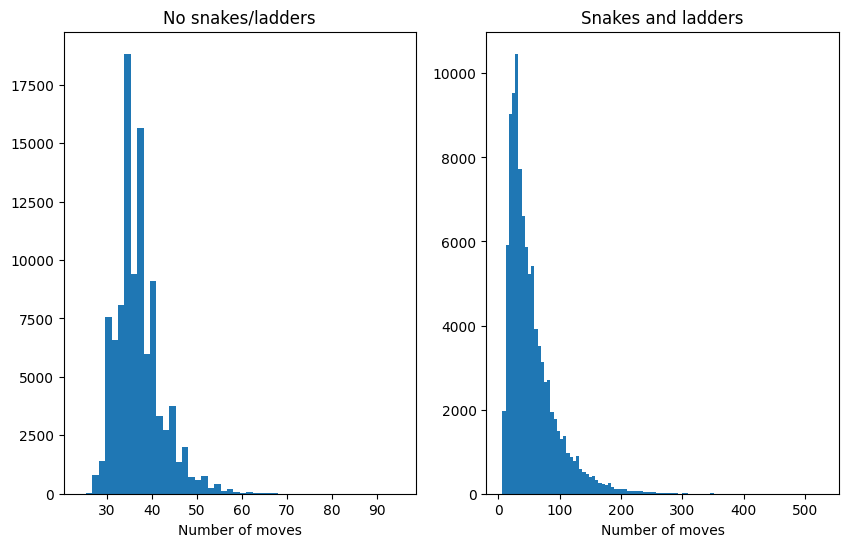

In [22]:
# Run the simulation a lot of times
n = 100000
no_snakes = np.array([sim_no_snakes() for i in range(n)])
snakes = np.array([sim_snakes() for i in range(n)])

fig, ax = plt.subplots(1,2)
ax[0].hist(no_snakes, bins=50)
ax[0].set_title("No snakes/ladders")
ax[0].set_xlabel('Number of moves')
ax[1].hist(snakes, bins=100)
ax[1].set_title("Snakes and ladders")
ax[1].set_xlabel('Number of moves')